In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
^C


In [4]:
#import zipfile
#zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
#zip_ref.extractall('/content')
#zip_ref.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/dogs-vs-cats.zip'

In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization,Dropout

In [7]:
#generators : are very useful to process large amount of data in batch batch size hence reducing the load on ram

train_ds= keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image= tf.cast(image/255. ,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds= validation_ds.map(process)

In [17]:
#create cnn model

model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [19]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [20]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5778 - loss: 2.1659 - val_accuracy: 0.7066 - val_loss: 0.5757
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 77ms/step - accuracy: 0.7109 - loss: 0.5641 - val_accuracy: 0.7428 - val_loss: 0.5304
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 76ms/step - accuracy: 0.7634 - loss: 0.4882 - val_accuracy: 0.7554 - val_loss: 0.4919
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 78ms/step - accuracy: 0.8061 - loss: 0.4199 - val_accuracy: 0.7618 - val_loss: 0.5422
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.8400 - loss: 0.3556 - val_accuracy: 0.7788 - val_loss: 0.4689
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8733 - loss: 0.2941 - val_accuracy: 0.7704 - val_loss: 0.4987
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.9115 - loss: 0.2126 - val_accuracy: 0.7816 - val_loss: 0.7886
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 78ms/step - accuracy: 0.9424 - loss: 0.1517 - 

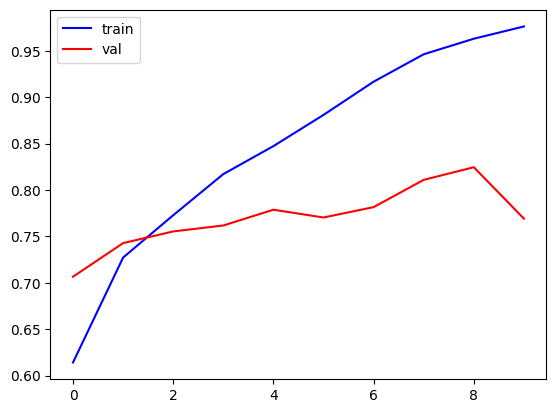

In [21]:
import matplotlib.pyplot as plt

#training and validation accuracy

plt.plot(history.history['accuracy'],color='blue',labels='train')
plt.plot(histroy.history['val_accuracy'],color='red',labels='val')
plt.legend()
plt.show()

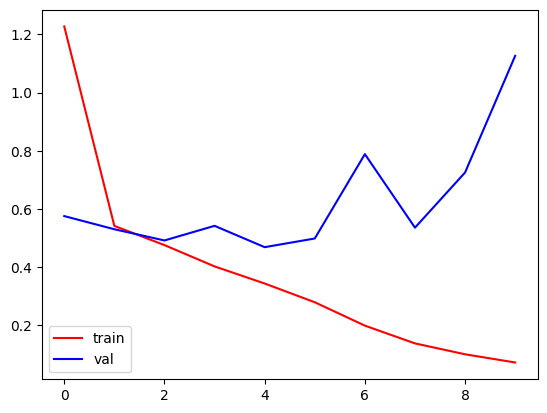

In [22]:
#validation loss and training loss

plt.plot(history.history['loss'],color='red',label="train")
plt.plot(history.history['val_loss'],color='blue',label="val")
plt.legend()
plt.show() #shows overfitting

In [ ]:
#ways to reduce overfitting

'''add more data
data Augmentation
dropout layers
batch normalization
L1/L2 Regularization

we used batch normalization and dropoutlayers to increase the valdidation accuracy'''

In [23]:
# testing our model with a new image

import cv2

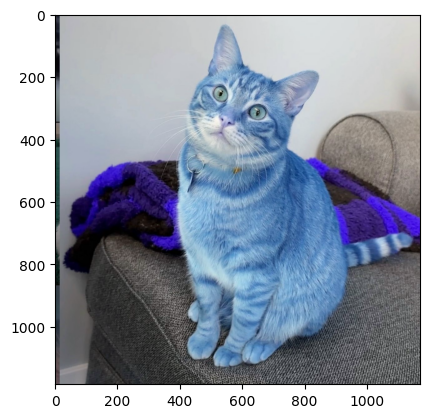

In [24]:
test_img= cv2.imread("/content/cat.jpg")
plt.imshow(test_img)

In [25]:
test_img.shape

(1185, 1170, 3)

In [28]:
test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape(1, 256, 256, 3)

In [29]:
test_input=test_img.reshape(1,256,256,3)

In [30]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


array([[0.00907958]], dtype=float32)

In [ ]:
# accuracy came around 80 but still the model is working decently